# Learning and Decision Making

The labs will consist of activities, marked in blocks titled **Activity XXX** like the one below. The activities in the lab today are just for fun---think of them as puzzles that allow you to practice some `numpy` programming. As such, no submission is necessary.

---

#### Activity 1.  Cycles vs vectorized operations      

Compare the time necessary to compute the sum of two 100,000 &times; 1 random vectors using:

* a for loop;
* a vectorized operation.

---

In [1]:
import numpy.random as rnd


In [2]:
from utils.decorators import timeit

import numpy as np

@timeit
def sum_with_loop(v1, v2):
    """Returns v1+v2 """
    v3 = np.zeros_like(v1)
    print(v3)
    for i in range(len(v1)):
        v3[i] = v2[i] + v1[i]
    return v3

@timeit
def sum_in_parallel(v1, v2):
    """"""
    return v1+v2  


In [3]:
size = 100_000
v1 = np.random.random(size)
v2 = np.random.random(size)
sum_with_loop(v1, v2)
sum_in_parallel(v1, v2)

[0. 0. 0. ... 0. 0. 0.]
>> sum_with_loop() took 0.029759 seconds to run
>> sum_in_parallel() took 0.000893 seconds to run


array([1.3454354 , 0.89794492, 0.77829879, ..., 1.03743053, 1.08771725,
       1.48814741])

---

#### Activity 2. Mountain car problem

Consider a car with a weak engine going up a tall mountain, as depicted in the following diagram:

<img src="mountain-car.png">

The velocity of the car is given by

$$v(t+1)=v(t)-\frac{1}{400}\cos(3p(t))+\frac{u(t)}{1000},\qquad v(t)\in[-0.07,0.07]$$

where $p(t)$ is the position of the car at time step $t$ and $u(t)$ is the acceleration action, which can be $1$ (positive acceleration), $0$ (do nothing) or $-1$ (negative acceleration). The position of the car, in turn, is given by

$$p(t+1)=p(t)+v(t+1),\qquad p(t)\in[-1.2,0.6].$$

Suppose that the car starts at position $p(0)=-\pi/3+0.6$ with a velocity of $v(0)=0$. 

Simulate a 1000-step trajectory of the car when $u(t)=1$ (always accelerate) for $t=0,\ldots,1000$. To do so, build a for loop from $t=0$ to $t=1000$ and use the equations above to compute $p(t)$ and $v(t)$. 

**Note:** Store all values of $p$ and $v$. Also, make sure that $p$ and $v$ stay within the provided bounds.

---

In [4]:
# Curr velocity: v(t+1)
# Last velocity: v(t)
# Same for others

In [5]:
import numpy as np

def get_curr_velocity(last_velocity, last_position, last_acceleration, max_vel=0.07, min_vel=-0.07):
    curr_velocity = last_velocity - (1/400)*np.cos(3*last_position) + (last_acceleration/100)
    if curr_velocity > max_vel:
        return max_vel
    elif curr_velocity < min_vel:
        return min_vel
    else:
        return curr_velocity

def get_curr_position(curr_velocity, last_position, last_acceleration, max_pos=0.6, min_pos=-1.2):
    # curr_velocity = get_curr_velocity(last_velocity, last_position, last_acceleration)
    curr_position = last_position + curr_velocity
    if curr_position > max_pos:
        return max_pos
    elif curr_velocity < min_pos:
        return min_pos
    else:
        return curr_position


In [6]:
def print_variables(velocity, position, acceleration):
    print(f'>> velocity: {velocity:.6} || position: {position:.6} || acceleration: {acceleration}')

In [7]:
t = range(1001)
velocity = np.zeros_like(t, dtype=float)
acceleration = np.zeros_like(t, dtype=float)
position = np.zeros_like(t, dtype=float)

position[0] = -np.pi/3 + 0.6
velocity[0] = 0
acceleration = 1
print_variables(velocity[0], position[0], acceleration)

for i in range(1,1001):
    velocity[i] = get_curr_velocity(velocity[i-1], position[i-1], acceleration)
    position[i] = get_curr_position(velocity[i], position[i-1], acceleration)
    print_variables(velocity[i], position[i], acceleration)

>> velocity: 0.0 || position: -0.447198 || acceleration: 1
>> velocity: 0.00943199 || position: -0.437766 || acceleration: 1
>> velocity: 0.0187953 || position: -0.41897 || acceleration: 1
>> velocity: 0.0280234 || position: -0.390947 || acceleration: 1
>> velocity: 0.0370546 || position: -0.353892 || acceleration: 1
>> velocity: 0.0458361 || position: -0.308056 || acceleration: 1
>> velocity: 0.0543298 || position: -0.253726 || acceleration: 1
>> velocity: 0.0625198 || position: -0.191206 || acceleration: 1
>> velocity: 0.07 || position: -0.121206 || acceleration: 1
>> velocity: 0.07 || position: -0.0512065 || acceleration: 1
>> velocity: 0.07 || position: 0.0187935 || acceleration: 1
>> velocity: 0.07 || position: 0.0887935 || acceleration: 1
>> velocity: 0.07 || position: 0.158794 || acceleration: 1
>> velocity: 0.07 || position: 0.228794 || acceleration: 1
>> velocity: 0.07 || position: 0.298794 || acceleration: 1
>> velocity: 0.07 || position: 0.368794 || acceleration: 1
>> veloci

---

#### Activity 3. Mountain car problem (cont.)

Suppose now that, at each step $t$, the car driver selects $u(t)=1$ with probability $0.7$, $u(t)=0$ with probability $0.2$, and $u(t)=-1$ with probability $0.1$. Repeat Activity 2.

**Note:** You may find useful the function `choice` from the module `numpy.random`.

---

In [8]:
t = range(1001)
velocity_with_acceleration = np.zeros_like(t, dtype=float)
position_with_acceleration = np.zeros_like(t, dtype=float)
acceleration = np.random.choice(a=[1, 0, -1], size=len(t), p=[0.7, 0.2, 0.1] )


In [9]:

position_with_acceleration[0] = -np.pi/3 + 0.6

velocity_with_acceleration[0] = 0
print_variables(velocity_with_acceleration[0], position_with_acceleration[0], acceleration[i])

for i in range(1,1001):
    velocity_with_acceleration[i] = get_curr_velocity(velocity_with_acceleration[i-1], position_with_acceleration[i-1], acceleration[i-1])
    position_with_acceleration[i] = get_curr_position(velocity_with_acceleration[i], position_with_acceleration[i-1], acceleration[i-1])
    print_variables(velocity_with_acceleration[i], position_with_acceleration[i], acceleration[i])

>> velocity: 0.0 || position: -0.447198 || acceleration: 0
>> velocity: 0.00943199 || position: -0.437766 || acceleration: 1
>> velocity: 0.0187953 || position: -0.41897 || acceleration: 1
>> velocity: 0.0280234 || position: -0.390947 || acceleration: 1
>> velocity: 0.0370546 || position: -0.353892 || acceleration: 1
>> velocity: 0.0458361 || position: -0.308056 || acceleration: 1
>> velocity: 0.0543298 || position: -0.253726 || acceleration: 1
>> velocity: 0.0625198 || position: -0.191206 || acceleration: 1
>> velocity: 0.07 || position: -0.121206 || acceleration: -1
>> velocity: 0.0576635 || position: -0.063543 || acceleration: 1
>> velocity: 0.0652087 || position: 0.00166574 || acceleration: 1
>> velocity: 0.07 || position: 0.0716657 || acceleration: 0
>> velocity: 0.0675576 || position: 0.139223 || acceleration: 1
>> velocity: 0.07 || position: 0.209223 || acceleration: 1
>> velocity: 0.07 || position: 0.279223 || acceleration: 1
>> velocity: 0.07 || position: 0.349223 || accelerat

---

#### Activity 4. Mountain car problem (cont.)

Plot in the same axis the position $p$ of the car as a function of $t$ as observed in Activities 2 and 3. What do you observe?

---

In [10]:
# Insert your code here.
# Plot commands

fig, ax = plt. subplots(3,1)

ax[0].plot(t,position, label='p(t)')
ax[0].plot(t,position_with_acceleration, '-.',label='p(t) with accel.' )
ax[0].legend()

ax[1].plot(t,velocity, label='p(t)')
ax[1].plot(t,velocity_with_acceleration, '-.',label='v(t) with accel.' )
ax[1].legend()

ax[2].plot(t,acceleration, '.', label='u(t)', )
ax[2].legend()
ax[2].set_xlabel('Timestep t');

fig.bbox_inches= 'tight'
plt.show()

NameError: name 'plt' is not defined

<font color='blue'>[Insert your comments here.]</font>
The position is 

---

#### Activity 5. Mountain car problem (conc.)

Suppose now that the driver selects $u(t)=-1$ until it reaches the position $p(t)=-0.85$ and then selects $u(t)=1$. Repeat Activity 2 and plot the three trajectories you obtained. What can you observe?

---

In [ ]:
t = range(1001)
velocity_with_acceleration = np.zeros_like(t, dtype=float)
position_with_acceleration = np.zeros_like(t, dtype=float)
# acceleration = np.random.choice(a=[1, 0, -1], size=len(t), p=[0.7, 0.2, 0.1] )
acceleration = -1

position_with_acceleration[0] = -np.pi/3 + 0.6
velocity_with_acceleration[0] = 0
print_variables(velocity_with_acceleration[0], position_with_acceleration[0], acceleration)

for i in range(1,1001):
    velocity_with_acceleration[i] = get_curr_velocity(velocity_with_acceleration[i-1], position_with_acceleration[i-1], acceleration)
    position_with_acceleration[i] = get_curr_position(velocity_with_acceleration[i], position_with_acceleration[i-1], acceleration)
    if position_with_acceleration[i] <= -0.85:
        acceleration = 1
        position_with_acceleration[i] = get_curr_position(velocity_with_acceleration[i], position_with_acceleration[i-1], acceleration)

    print_variables(velocity_with_acceleration[i], position_with_acceleration[i], acceleration)

>> velocity: 0.0 || position: -0.447198 || acceleration: -1
>> velocity: -0.010568 || position: -0.457766 || acceleration: -1
>> velocity: -0.0210586 || position: -0.478824 || acceleration: -1
>> velocity: -0.0313934 || position: -0.510217 || acceleration: -1
>> velocity: -0.0414937 || position: -0.551711 || acceleration: -1
>> velocity: -0.0512831 || position: -0.602994 || acceleration: -1
>> velocity: -0.0606932 || position: -0.663687 || acceleration: -1
>> velocity: -0.0696732 || position: -0.733361 || acceleration: -1
>> velocity: -0.07 || position: -0.803361 || acceleration: -1
>> velocity: -0.07 || position: -0.873361 || acceleration: 1
>> velocity: -0.0578323 || position: -0.931193 || acceleration: 1
>> velocity: -0.0454822 || position: -0.976675 || acceleration: 1
>> velocity: -0.0330379 || position: -1.00971 || acceleration: 1
>> velocity: -0.0205537 || position: -1.03027 || acceleration: 1
>> velocity: -0.00805696 || position: -1.03832 || acceleration: 1
>> velocity: 0.004442

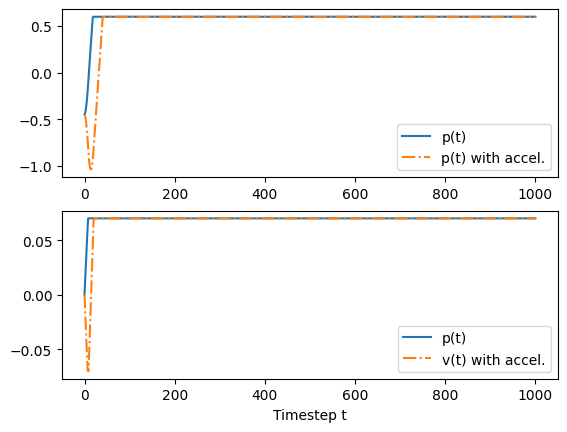

In [ ]:

fig, ax = plt. subplots(2,1)

ax[0].plot(t,position, label='p(t)')
ax[0].plot(t,position_with_acceleration, '-.',label='p(t) with accel.' )
ax[0].legend()

ax[1].plot(t,velocity, label='p(t)')
ax[1].plot(t,velocity_with_acceleration, '-.',label='v(t) with accel.' )
ax[1].legend()

# ax[2].plot(t,acceleration, '.', label='u(t)', )
# ax[2].legend()
ax[1].set_xlabel('Timestep t');

fig.bbox_inches= 'tight'
plt.show()

---

#### Activity 5

Export your file as a Python script. In particular:

* Go to the menu "**File**", select the option "**Download as &#x27A4;**" and then "**Python (.py)**".
* Name your file `padi-lab0-groupXXX.py`, where you replace `XXX` by your group number.

Open the resulting Python file. Note that all the markdown in this notebook is converted to comments in the resulting Python file. 

* Delete **all** comments in the Python file, keeping only the "pure" Python code and the comments corresponding to your text answers. 
* Delete all prints and sanity checks you included in the code.

At some point in the python file, you will find the line:

`get_ipython().run_line_magic('matplotlib', 'notebook')`

This is a line used by Jupyter and which will yield an error if the Python script is executed as is. 

* Remove the aforementioned line.
* Run the resulting file. To do so, you can open a terminal window and execute the shell command `python padi-lab0-groupXXX.py`. Verify that everything works properly. 

In future labs, you should always follow these steps to make sure that everything works properly before submitting a lab assignment.

---